<a href="https://colab.research.google.com/github/angui100/HongYe/blob/master/Kaggle_Wisconsion_Breast_Cancer_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#prepare for data file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_filename = '/content/drive/My Drive/dataset/wdbc.data'

In [0]:
idKey = "id"
diagnosisKey = "diagnosis"
radiusMeanKey = "radius_mean"
textureMeanKey = "texture_mean"
perimeterMeanKey = "perimeter_mean"
areaMeanKey = "area_mean"
smoothnessMeanKey = "smoothness_mean"
compactnessMeanKey = "compactness_mean"
concavityMeanKey = "concavity_mean"
concavePointsMeanKey = "concave points_mean"
symmetryMeanKey = "symmetry_mean"
fractalDimensionMean = "fractal_dimension_mean"
radiusSeKey = "radius_se"
textureSeKey = "texture_se"
perimeterSeKey = "perimeter_se"
areaSeKey = "area_se"
smoothnessSeKey = "smoothness_se"
compactnessSeKey = "compactness_se"
concavitySeKey = "concavity_se"
concavePointsSeKey = "concave points_se"
symmetrySeKey = "symmetry_se"
fractalDimensionSeKey = "fractal_dimension_se"
radiusWorstKey = "radius_worst"
textureWorstKey = "texture_worst"
perimeterWorstKey = "perimeter_worst"
areaWorstKey = "area_worst"
smoothnessWorstKey = "smoothness_worst"
compactnessWorstKey = "compactness_worst"
concavityWorstKey = "concavity_worst"
concavePointsWorstKey = "concave points_worst"
symmetryWorstKey = "symmetry_worst"
fractalDimensionWorstKey = "fractal_dimension_worst"

In [0]:
train_columns = [idKey, diagnosisKey, radiusMeanKey, textureMeanKey, perimeterMeanKey, areaMeanKey, smoothnessMeanKey, compactnessMeanKey, concavityMeanKey, concavePointsMeanKey, symmetryMeanKey, fractalDimensionMean, radiusSeKey, textureSeKey, perimeterSeKey, areaSeKey, smoothnessSeKey, compactnessSeKey, concavitySeKey, concavePointsSeKey, symmetrySeKey, fractalDimensionSeKey, radiusWorstKey, textureWorstKey, perimeterWorstKey, areaWorstKey, smoothnessWorstKey, compactnessWorstKey, concavityWorstKey, concavePointsWorstKey, symmetryWorstKey, fractalDimensionWorstKey]

In [0]:
def get_train_data():
    df = pd.read_csv(train_filename, names= train_columns, delimiter=',', skiprows=1)
    return df

In [0]:
train_data = get_train_data()

In [10]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [11]:
train_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015063,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032217,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
train_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
print ("Malignant")
print (train_data.area_mean[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")
print (train_data.area_mean[train_data.diagnosis == "B"].describe())

Malignant
count     211.000000
mean      978.269194
std       368.809660
min       361.600000
25%       705.000000
50%       930.900000
75%      1204.500000
max      2501.000000
Name: area_mean, dtype: float64

Benign
count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64


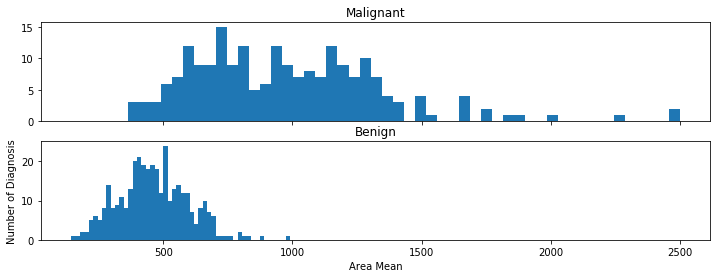

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(train_data.area_mean[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('Malignant')

ax2.hist(train_data.area_mean[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('Benign')

plt.xlabel('Area Mean')
plt.ylabel('Number of Diagnosis')
plt.show()

In [15]:
print ("Malignant")
print (train_data.area_worst[train_data.diagnosis == "M"].describe())
print ()
print ("Benign")
print (train_data.area_worst[train_data.diagnosis == "B"].describe())

Malignant
count     211.000000
mean     1419.458294
std       597.966989
min       508.100000
25%       969.200000
50%      1302.000000
75%      1702.500000
max      4254.000000
Name: area_worst, dtype: float64

Benign
count     357.000000
mean      558.899440
std       163.601424
min       185.200000
25%       447.100000
50%       547.400000
75%       670.000000
max      1210.000000
Name: area_worst, dtype: float64


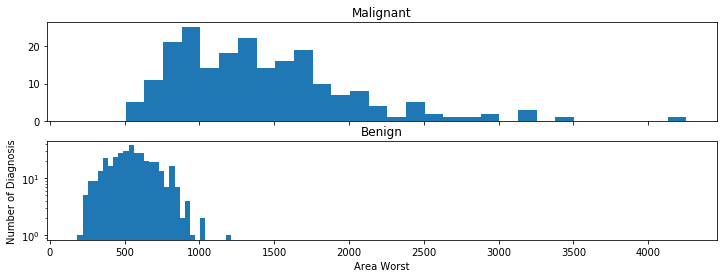

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(train_data.area_worst[train_data.diagnosis == "M"], bins = bins)
ax1.set_title('Malignant')

ax2.hist(train_data.area_worst[train_data.diagnosis == "B"], bins = bins)
ax2.set_title('Benign')

plt.xlabel('Area Worst')
plt.ylabel('Number of Diagnosis')
plt.yscale('log')
plt.show()

In [0]:
#Select only the rest of the features.
r_data = train_data.drop([idKey, areaMeanKey, areaWorstKey, diagnosisKey], axis=1)
r_features = r_data.columns

In [18]:
r_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [0]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(r_data[r_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn][train_data.diagnosis == "M"], bins=50)
    sns.distplot(train_data[cn][train_data.diagnosis == "B"], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [0]:
train_data.loc[train_data.diagnosis == "M", 'diagnosis'] = 1
train_data.loc[train_data.diagnosis == "B", 'diagnosis'] = 0

In [26]:
train_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0


In [0]:
#Create a new feature for benign (non-malignant) diagnosis.
train_data.loc[train_data.diagnosis == 0, 'benign'] = 1
train_data.loc[train_data.diagnosis == 1, 'benign'] = 0

In [0]:
train_data['benign'] = train_data.benign.astype(int)

In [0]:
train_data = train_data.rename(columns={'diagnosis': 'malignant'})

In [27]:
print(train_data.benign.value_counts())
print()
print(train_data.malignant.value_counts())

1    357
0    211
Name: benign, dtype: int64

0    357
1    211
Name: malignant, dtype: int64


In [28]:
pd.set_option("display.max_columns",101)
train_data.head()

,id,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0


In [0]:
# Create dataframes of only Malignant and Benign diagnosis.
Malignant = train_data[train_data.malignant == 1]
Benign = train_data[train_data.benign == 1]

In [0]:
# Set train_X equal to 80% of the malignant diagnosis.
train_X = Malignant.sample(frac=0.8)
count_Malignants = len(train_X)

In [0]:
# Add 80% of the benign diagnosis to train_X.
train_X = pd.concat([train_X, Benign.sample(frac = 0.8)], axis = 0)

In [0]:
# test_X contains all the diagnostics not in train_X.
test_X = train_data.loc[~train_data.index.isin(train_X.index)]

In [0]:
# Shuffle the dataframes so that the training is done in a random order.
train_X = shuffle(train_X)
test_X = shuffle(test_X)

In [0]:
# Add our target features to train_Y and test_Y

train_Y = train_X.malignant
train_Y = pd.concat([train_Y, train_X.benign], axis=1)


In [0]:
test_Y = test_X.malignant
test_Y = pd.concat([test_Y, test_X.benign], axis=1)


In [0]:
#Drop target features from train_X and test_X

train_X = train_X.drop(['malignant','benign'], axis = 1)
test_X = test_X.drop(['malignant','benign'], axis = 1)

In [37]:
# Check to ensure all of the training/testing dataframes are of the correct length

print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

455
455
113
113


In [0]:
features = train_X.columns.values

In [39]:
features

array(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [0]:
#Transform each feature in features so that it has a mean of 0 and standard deviation of 1; This helps with training the softmax algorithm.

for feature in features:
    mean, std = train_data[feature].mean(), train_data[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

In [0]:
# Parameters

learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 


In [0]:
# Number of input nodes

input_nodes = train_X.shape[1]
# Number of labels (malignant and benign)

num_labels = 2

In [43]:
# Split the testing data into validation and testing sets

split = int(len(test_Y)/2)

train_size = train_X.shape[0]
n_samples = train_Y.shape[0]

input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()
input_X_valid = test_X.as_matrix()[:split]
input_Y_valid = test_Y.as_matrix()[:split]
input_X_test = test_X.as_matrix()[split:]
input_Y_test = test_Y.as_matrix()[split:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: F

In [0]:
def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

In [45]:
#Number of nodes in each hidden layer

hidden_nodes1 = round(calculate_hidden_nodes(input_nodes))
hidden_nodes2 = round(calculate_hidden_nodes(hidden_nodes1))
hidden_nodes3 = round(calculate_hidden_nodes(hidden_nodes2))
print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)

31 23 17 13


In [0]:
#Percent of nodes to keep during dropout.

pkeep = tf.placeholder(tf.float32)

In [0]:
# Input

x = tf.placeholder(tf.float32, [None, input_nodes])

In [0]:
# Layer 1

W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

In [50]:
# Layer 2

W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)
# Layer 3

W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.1)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)
# Layer 4

W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.1)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)
#Output

y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels]) 
# Minimize error using cross entropy

cost = -tf.reduce_sum(y_ * tf.log(y))
# AdamOptimizer

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# Test Model

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
# Calculate accuracy

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Initializing the variables

init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch: 0 Acc = 0.62857 Cost = 305.24786 Valid_Acc = 0.58929 Valid_Cost =  37.83236
Epoch: 1 Acc = 0.67473 Cost = 277.36234 Valid_Acc = 0.62500 Valid_Cost =  35.04304
Epoch: 2 Acc = 0.85714 Cost = 219.54773 Valid_Acc = 0.87500 Valid_Cost =  29.08087
Epoch: 3 Acc = 0.93187 Cost = 146.65115 Valid_Acc = 0.89286 Valid_Cost =  22.01895
Epoch: 4 Acc = 0.94725 Cost = 98.11472 Valid_Acc = 0.91071 Valid_Cost =  18.01717
Optimization Finished!


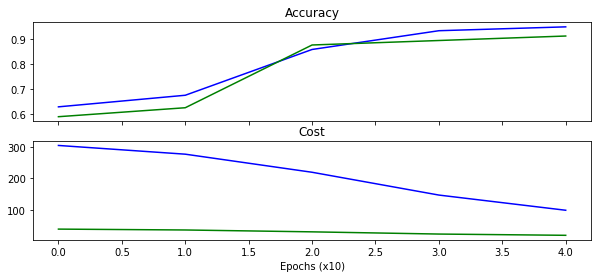

In [51]:
# Launch the graph

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = input_X[batch * batch_size : (1 + batch) * batch_size]
            batch_y = input_Y[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], 
                                               feed_dict={x: input_X, y_: input_Y, 
                                                          pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], 
                                                     feed_dict={x: input_X_valid, 
                                                                y_: input_Y_valid, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost), 
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print("Optimization Finished!")
    
    # Plot the accuracy and cost summaries 
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

    ax1.plot(accuracy_history, color='b') # blue
    ax1.plot(valid_accuracy_history, color='g') # green
    ax1.set_title('Accuracy')

    ax2.plot(cost_history, color='b')
    ax2.plot(valid_cost_history, color='g')
    ax2.set_title('Cost')

    plt.xlabel('Epochs (x10)')
    plt.show()

## Conclusion
After using the AdamOptimizer model with all of the features in our Neural Network, it gives a prediction accuracy of ~96% and a cross-validation score of ~96% for the test data set. This models performs reasonably well and I suppose that if we have created new features, we could have built a more useful neural network.